<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/master/examples/crime_sim_poisson_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# notebook for import our crime sim module and running some tests

## Notes on running

For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [1]:
%cd ~/

! git clone --single-branch --branch crime_cat_refac https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 413 (delta 46), reused 66 (delta 29), pack-reused 325
Receiving objects: 100% (413/413), 20.96 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [2]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 215kB 7.4MB/s 
     |████████████████████████████████| 92kB 31.1MB/s 
     |████████████████████████████████| 13.1MB 48.3MB/s 
     |████████████████████████████████| 20.4MB 1.8MB/s 
     |████████████████████████████████| 10.5MB 31.7MB/s 
     |████████████████████████████████| 235kB 43.0MB/s 
     |████████████████████████████████| 512kB 46.4MB/s 
     |████████████████████████████████| 61kB 23.9MB/s 
     |████████████████████████████████| 153kB 26.0MB/s 
ERROR: kaggle 1.5.5 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 4.5.4 which is incompatible.
ERROR: datascience 0.

# RESTART RUNTIME

In [2]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit


## Using the package and simulating data from historic data

In [3]:
import crime_sim_toolkit.poisson_sim as Poisson_sim
import os
import sys


sim1 = Poisson_sim.Poisson_sim(LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], timeframe='Day')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  0
No files found in data folder.
Defaulting to test data.
Psuedo days allocated to all reports.


In [4]:
sim1.data.head()

Counts             Crime_type  Day  LSOA_code  Mon  Year
0       1  Anti-social behaviour   23  E01010568    7  2016
1       2  Anti-social behaviour   16  E01010569    7  2016
2       2  Anti-social behaviour   27  E01010569    7  2016
3       2  Anti-social behaviour   31  E01010569    7  2016
4       1  Anti-social behaviour    3  E01010569    7  2016

In [5]:
test_data = sim1.out_of_bag_prep(sim1.data)

train_data = sim1.oob_train_split(sim1.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [6]:
%%time

datat = sim1.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 7 Day: 1
Month: 7 Day: 2
Month: 7 Day: 3
Month: 7 Day: 4
Month: 7 Day: 5
Month: 7 Day: 6
Month: 7 Day: 7
Month: 7 Day: 8
Month: 7 Day: 9
Month: 7 Day: 10
Month: 7 Day: 11
Month: 7 Day: 12
Month: 7 Day: 13
Month: 7 Day: 14
Month: 7 Day: 15
Month: 7 Day: 16
Month: 7 Day: 17
Month: 7 Day: 18
Month: 7 Day: 19
Month: 7 Day: 20
Month: 7 Day: 21
Month: 7 Day: 22
Month: 7 Day: 23
Month: 7 Day: 24
Month: 7 Day: 25
Month: 7 Day: 26
Month: 7 Day: 27
Month: 7 Day: 28
Month: 7 Day: 29
Month: 7 Day: 30
Month: 7 Day: 31
CPU times: user 16min 38s, sys: 12 s, total: 16min 50s
Wall time: 16min 32s


In [7]:
datat.head()

Day  Mon             Crime_type  Counts  LSOA_code
0    1    7  Anti-social behaviour       0  E01010578
1    1    7  Anti-social behaviour       0  E01010584
2    1    7  Anti-social behaviour       0  E01010587
3    1    7  Anti-social behaviour       0  E01010589
4    1    7  Anti-social behaviour       0  E01010595

Root mean squared error of poisson sampler:  1.2
Mean absolute error:  0.7
Median absolute error:  0.0


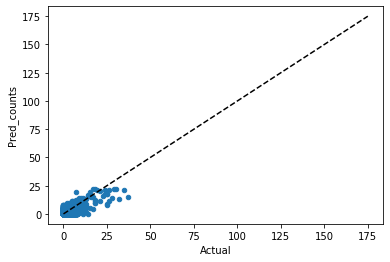

In [8]:
diff_table = sim1.error_Reporting(test_data=test_data, simulated_data=datat)

In [9]:
diff_table.head()

Day  Pred_counts  Actual  Difference
LSOA_code                                      
E01010568    1            0       0           0
E01010569    1            0       1           1
E01010570    1            0       0           0
E01010571    1            0       1           1
E01010572    1            0       0           0

## Section showing mapping example


In [0]:
from crime_sim_toolkit import vis_utils

In [0]:
tablet = diff_table[diff_table.Day == 1]

tablet.columns = ['Day','Pred_counts','Actual','Counts']

In [12]:
%%time

vis_utils.get_choropleth(tablet)

Total number of LAs passed.
For file 0 there are 310 LSOAs
For file 1 there are 128 LSOAs
For file 2 there are 259 LSOAs
For file 3 there are 482 LSOAs
For file 4 there are 209 LSOAs


CPU times: user 2min 49s, sys: 3.61 s, total: 2min 53s
Wall time: 2min 54s


## Section converting data to reports for ABM

Includes use of adding crime descriptions

In [0]:
from crime_sim_toolkit import utils

In [14]:
%%time

synth_counts = utils.counts_to_reports(datat)

CPU times: user 5.26 s, sys: 3.02 ms, total: 5.27 s
Wall time: 5.82 s


In [15]:
synth_counts.head()

Day Mon             Crime_type  LSOA_code        UID
0   1   7  Anti-social behaviour  E01010598  E010117A0
1   1   7  Anti-social behaviour  E01010663  E010117A0
2   1   7  Anti-social behaviour  E01010663  E010117A1
3   1   7  Anti-social behaviour  E01010663  E010117A2
4   1   7  Anti-social behaviour  E01010664  E010117A0

In [0]:
# start here

synth_counts_des = utils.populate_offence(synth_counts)

In [18]:
synth_counts_des

Day Mon  ...    Police_force                  Crime_description
0      1   7  ...  West Yorkshire              Anti-social behaviour
1      1   7  ...  West Yorkshire              Anti-social behaviour
2      1   7  ...  West Yorkshire              Anti-social behaviour
3      1   7  ...  West Yorkshire              Anti-social behaviour
4      1   7  ...  West Yorkshire              Anti-social behaviour
...   ..  ..  ...             ...                                ...
7718  31   7  ...  West Yorkshire  Rape of a female aged 16 and over
7719  31   7  ...  West Yorkshire           Malicious Communications
7720  31   7  ...  West Yorkshire                           Stalking
7721  31   7  ...  West Yorkshire           Malicious Communications
7722  31   7  ...  West Yorkshire             Assault without injury

[7723 rows x 7 columns]

In [0]:
synth_counts_des.to_csv('synthetic_day_reports.csv')

In [0]:
from google.colab import files

files.download('synthetic_day_reports.csv')

In [0]:
# big undersampling evident from comparing size of synthetic counts frame and counts in test data

In [19]:
synth_counts.shape

(7723, 6)

In [20]:
test_data.Counts.sum()

30739

## Example with Week timeframe dimension

In [0]:
import crime_sim_toolkit.poisson_sim as Poisson_sim
import os
import sys


sim1 = Poisson_sim.Poisson_sim(LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], timeframe='Week')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  0
No files found in data folder.
Defaulting to test data.
Psuedo days allocated to all reports.
Week numbers allocated.


In [0]:
test_data = sim1.out_of_bag_prep(sim1.data)

train_data = sim1.oob_train_split(sim1.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [0]:
%%time

datat = sim1.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 7 Week: 26
Month: 7 Week: 27
Month: 7 Week: 28
Month: 7 Week: 29
Month: 7 Week: 30
Month: 7 Week: 31
CPU times: user 3min 20s, sys: 2.07 s, total: 3min 22s
Wall time: 3min 19s


In [0]:
datat.columns = ['Week','Mon','Crime_type','Counts','LSOA_code']

Root mean squared error of poisson sampler:  3.6
Mean absolute error:  2.4
Median absolute error:  2.0


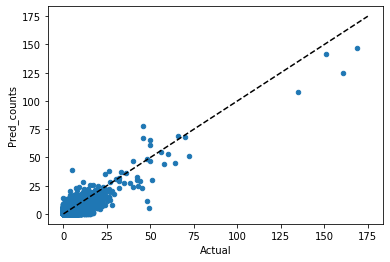

In [0]:
diff_table = sim1.error_Reporting(test_data=test_data, simulated_data=datat)

In [0]:
%%time

synth_counts = utils.counts_to_reports(datat)

CPU times: user 12.5 s, sys: 5.4 ms, total: 12.5 s
Wall time: 12.5 s


In [0]:
synth_counts.head()

Week Mon             Crime_type  LSOA_code         UID
0   26   7  Anti-social behaviour  E01010575  E0101267A0
1   26   7  Anti-social behaviour  E01010575  E0101267A1
2   26   7  Anti-social behaviour  E01010578  E0101267A0
3   26   7  Anti-social behaviour  E01010582  E0101267A0
4   26   7  Anti-social behaviour  E01010582  E0101267A1

In [0]:
synth_counts.shape

(20389, 5)

In [0]:
test_data.Counts.sum()

30739

In [0]:
# undersamples but not as significantly as Day sampler